In [163]:
import tushare as ts
hist_data = ts.get_hist_data('600007') #一次性获取全部日k线数据
hist_data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2017-04-26,20.01,20.31,20.19,19.94,7190.79,0.18,0.90,20.222,20.514,20.557,9302.38,10941.69,13237.72
2017-04-25,19.95,20.27,20.01,19.82,8077.00,-0.10,-0.50,20.280,20.563,20.593,10617.81,12130.72,13741.67
2017-04-24,20.46,20.46,20.11,19.91,12858.08,-0.39,-1.90,20.442,20.670,20.636,12351.44,13189.93,14102.62
2017-04-21,20.30,20.51,20.50,20.00,6040.01,0.20,0.98,20.596,20.771,20.654,11927.82,14313.84,14148.95
2017-04-20,20.47,20.47,20.30,20.21,12346.00,-0.18,-0.88,20.672,20.797,20.651,13342.32,14694.04,14342.01


In [164]:
hist_data_qfq = ts.get_h_data('600007') #前复权
hist_data_qfq.head()

[Getting data:]####

,open,high,close,low,volume,amount
date,,,,,,
2017-04-26,20.01,20.31,20.19,19.94,719079.0,14511422.0
2017-04-25,19.95,20.27,20.01,19.82,807700.0,16220953.0
2017-04-24,20.46,20.46,20.11,19.91,1285808.0,25869491.0
2017-04-21,20.30,20.51,20.50,20.00,604001.0,12271765.0
2017-04-20,20.47,20.47,20.30,20.21,1234600.0,25073051.0


In [165]:
import pandas as pd
# 添加不复权数据
STOCK = hist_data[['open','high','low','close','volume']]
# 修改column名称
STOCK = STOCK.rename(index = str,columns={"open": "Open", "high": "High","low":"Low","close":"Close","volume":"Volume"})
# 修改index名称
STOCK = STOCK.rename_axis("Date")
# 添加前复权数据
STOCK = STOCK.join(hist_data_qfq.close)
#STOCK = STOCK.join(hist_data.close) # for 上证综指
# 修改column名称
STOCK = STOCK.rename(index = str,columns={"close": "Adj Close"})
STOCK.head()
#STOCK.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-04-26 00:00:00,20.01,20.31,19.94,20.19,7190.79,20.19
2017-04-25 00:00:00,19.95,20.27,19.82,20.01,8077.00,20.01
2017-04-24 00:00:00,20.46,20.46,19.91,20.11,12858.08,20.11
2017-04-21 00:00:00,20.30,20.51,20.00,20.50,6040.01,20.50
2017-04-20 00:00:00,20.47,20.47,20.21,20.30,12346.00,20.30


In [166]:
# 保存文件
STOCK.to_csv("data/XOM.csv")

In [105]:
import pandas as pd

def test_run():
    """Function called by Test Run."""
    df = pd.read_csv("data/AAPL.csv")
    print df.tail()# TODO: Print last 5 rows of the data frame


if __name__ == "__main__":
    test_run()

                    Date   Open   High    Low  Close     Volume  Adj_Close
727  2014-05-06 00:00:00  10.92  11.09  10.90  10.95  267770.91        NaN
728  2014-05-05 00:00:00  11.10  11.11  10.83  10.99  403270.50        NaN
729  2014-04-30 00:00:00  11.18  11.22  11.09  11.14  259596.42        NaN
730  2014-04-29 00:00:00  11.02  11.25  10.92  11.16  413621.59        NaN
731  2014-04-28 00:00:00  11.25  11.28  10.96  11.03  526045.00        NaN


In [111]:
"""Compute mean volume"""

import pandas as pd

def get_mean_volume(symbol):
    """Return the mean volume for stock indicated by symbol.
    
    Note: Data for a stock is stored in file: data/<symbol>.csv
    """
    df = pd.read_csv("data/{}.csv".format(symbol))  # read in data
    # TODO: Compute and return the mean volume for this stock
    return df['Volume'].mean()

def test_run():
    """Function called by Test Run."""
    for symbol in ['AAPL', 'IBM']:
        print "Mean Volume"
        print symbol, get_mean_volume(symbol)


if __name__ == "__main__":
    test_run()

Mean Volume
AAPL 958448.177787
Mean Volume
IBM 1568903.63432


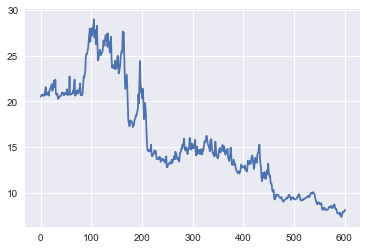

In [118]:
"""Plot High prices for IBM"""
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def test_run():
    df = pd.read_csv("data/IBM.csv")
    # TODO: Your code here
    plt.plot(df['High'])
    plt.show()  # must be called to show plots


if __name__ == "__main__":
    test_run()

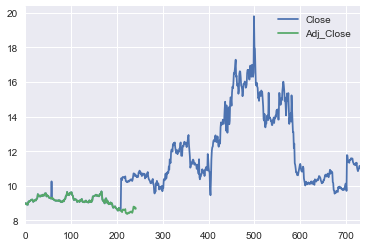

In [123]:
"""Plot two columes"""
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def test_run():
    df = pd.read_csv("data/AAPL.csv")
    # TODO: Your code here
    df[['Close','Adj_Close']].plot()
    plt.show()  # must be called to show plots


if __name__ == "__main__":
    test_run()

In [158]:
"""Utility functions"""

import os
import pandas as pd

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_tmp = pd.read_csv(symbol_to_path(symbol),index_col = "Date",parse_dates = True,usecols = ['Date','Adj Close'],na_values = ['nan'])
        df_tmp = df_tmp.rename(columns = {'Adj Close':symbol})
        #print df_tmp
        df = df.dropna()
        df = df.join(df_tmp)
    return df


def test_run():
    # Define a date range
    dates = pd.date_range('2017-01-22', '2017-01-26')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    print df


if __name__ == "__main__":
    test_run()

                SPY   GOOG    IBM    GLD
2017-01-23  3136.77  16.57  20.74  14.23
2017-01-24  3142.55  16.69  20.69  14.26
2017-01-25  3149.55  16.69  20.61  14.43
2017-01-26  3159.17  16.74  20.68  14.44


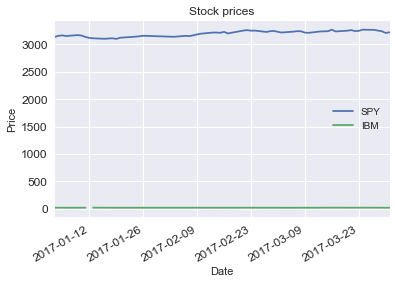

In [160]:
"""Slice and plot"""

import os
import pandas as pd
import matplotlib.pyplot as plt


def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # TODO: Your code here
    # Note: DO NOT modify anything else!
    df = df.ix[start_index:end_index,columns]
    plot_data(df, title="Stock prices")
    
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def test_run():
    # Define a date range
    dates = pd.date_range('2017-01-01', '2017-12-31')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)

    # Slice and plot
    plot_selected(df, ['SPY', 'IBM'], '2017-01-01', '2017-04-01')


if __name__ == "__main__":
    test_run()
